In [16]:
import numpy as np;
import matplotlib.pyplot as plt;
from scipy.fft import fft, fftfreq

import scipy.io.wavfile as sw
from scipy.signal import find_peaks
sam, d = sw.read("drip.wav");


d = [x[0] for x in d]

In [28]:
sam

48000

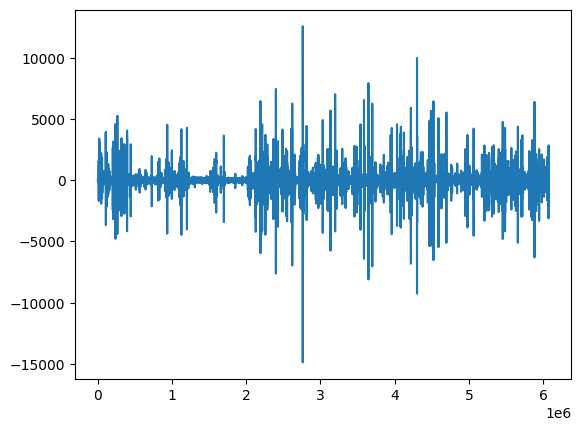

In [24]:
plt.plot(d)

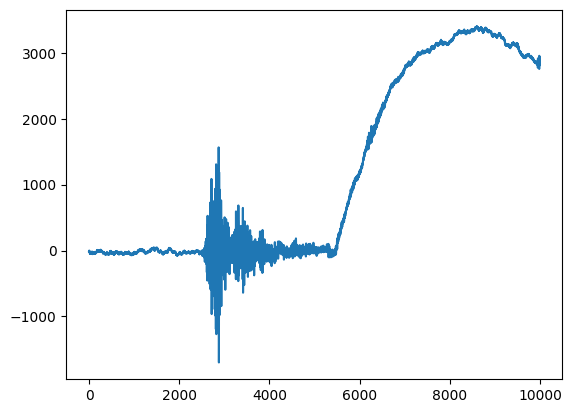

In [25]:
plt.plot(d[10000:20000])

Text(0, 0.5, 'Audio of water dripping')

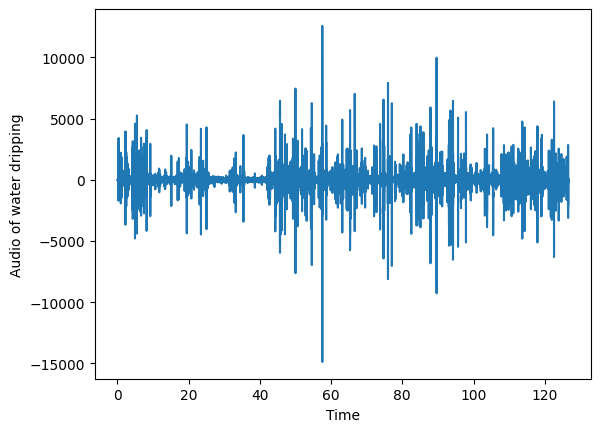

In [26]:
N = np.size(d)
t = np.arange(N)*1.0/sam
plt.plot(t,d)
plt.xlabel("Time")
plt.ylabel("Audio of water dripping")

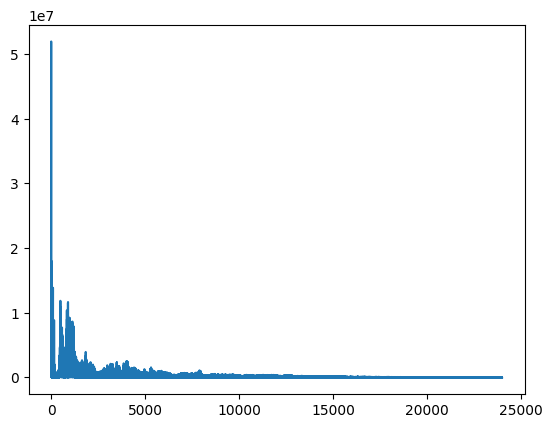

In [20]:
dk = fft(d)[:N//2]
xk = fftfreq(N, 1.0/sam)[:N//2]
plt.plot(xk, np.abs(dk))

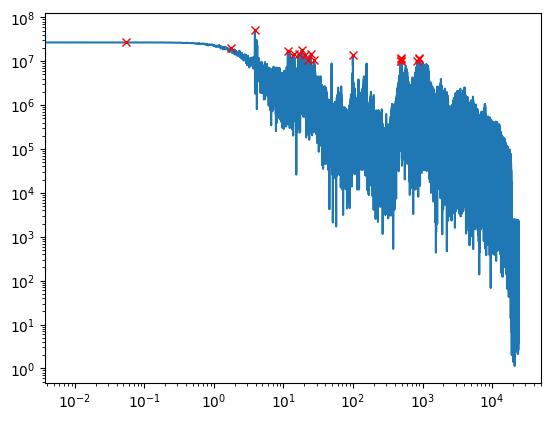

In [32]:
plt.loglog(xk, np.abs(dk))
peaks, _ = find_peaks(np.abs(dk), height = 1e7, distance=200)
plt.loglog(xk[peaks], np.abs(dk[peaks]), 'xr')

In [33]:
peaks

array([     7,    226,    493,   1466,   1770,   2095,   2314,   2594,
         2875,   3129,   3512,  12638,  61830,  62123,  62343,  62786,
       105901, 113204, 113765])

In [35]:
time_intervals = []

for i in range(len(peaks)-1):
    interval = peaks[i+1]-peaks[i]
    time_intervals.append(interval)

In [40]:
print(time_intervals)

[219, 267, 973, 304, 325, 219, 280, 281, 254, 383, 9126, 49192, 293, 220, 443, 43115, 7303, 561]


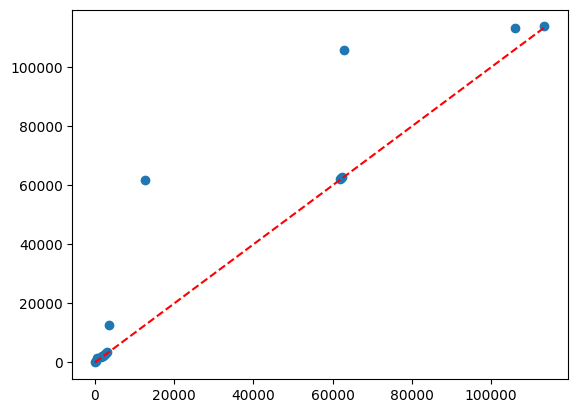

In [51]:
plt.scatter(peaks[:-1], peaks[1:])
plt.plot(peaks, peaks, 'r--')